In [1]:
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set()
import pandas as pd
import numpy as np
from datetime import datetime
import math
import json

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
target_terms = ["BBCWorld", "CBSNews","CNN","FoxNews","nytimes"]

In [6]:
sentiments = []
desired = 100 

In [7]:
for target in target_terms:
        counter = 0
        # Get desired number of tweets (desired = 100 in this case for each target)
        while (counter < desired):   # if desired number of tweets don't get fetched, get more 
            public_tweets = api.search(target, count=(desired-counter), result_type="recent")
            
            for tweet in public_tweets['statuses']:       # Loop through all tweets 
                results = analyzer.polarity_scores(tweet["text"])  # Run Vader Analysis on each tweet
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                
                # convert datetime object to string and then strip out the 10 chars(date)
                Date = str(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y"))
                Date = Date[:19]     # extract date and time
        
                # Add sentiments for each tweet into an array
                sentiments.append({"Source": target,
                            "Text": tweet["text"],
                            "DateTime": Date, 
                            "Compound": compound,
                            "Pos": pos,
                            "Neg": neu,
                            "Neu": neg,
                            "Tweets Ago": counter+1})
                # increment counter 
                counter = counter + 1
    
sentiments_df = pd.DataFrame.from_dict(sentiments)  # Convert sentiments[] to DataFrame

sentiments_df

Compound             DateTime    Neg    Neu    Pos    Source  \
0      0.0000  2018-06-09 23:39:05  1.000  0.000  0.000  BBCWorld   
1      0.8164  2018-06-09 23:38:51  0.605  0.000  0.395  BBCWorld   
2     -0.4215  2018-06-09 23:38:41  0.813  0.125  0.062  BBCWorld   
3      0.9061  2018-06-09 23:38:32  0.345  0.111  0.544  BBCWorld   
4      0.3612  2018-06-09 23:38:30  0.872  0.000  0.128  BBCWorld   
5      0.0000  2018-06-09 23:38:30  1.000  0.000  0.000  BBCWorld   
6     -0.7096  2018-06-09 23:38:26  0.772  0.228  0.000  BBCWorld   
7      0.0000  2018-06-09 23:38:24  1.000  0.000  0.000  BBCWorld   
8     -0.4215  2018-06-09 23:38:19  0.813  0.125  0.062  BBCWorld   
9     -0.4215  2018-06-09 23:38:18  0.813  0.125  0.062  BBCWorld   
10    -0.4215  2018-06-09 23:38:05  0.813  0.125  0.062  BBCWorld   
11    -0.5994  2018-06-09 23:38:05  0.822  0.178  0.000  BBCWorld   
12    -0.4215  2018-06-09 23:37:37  0.813  0.125  0.062  BBCWorld   
13     0.4404  2018-06-09 23:37:34  0.508  0.000  0.492  BBCWorld   
14    -0.0101  2018-06-09 23:37:28  0.799  0.102  0.099  BBCWorld   
15     0.0000  2018-06-09 23:37:11  0.750  0.125  0.125  BBCWorld   
16    -0.4215  2018-06-09 23:37:04  0.813  0.125  0.062  BBCWorld   
17    -0.4215  2018-06-09 23:37:01  0.813  0.125  0.062  BBCWorld   
18    -0.7231  2018-06-09 23:37:00  0.569  0.431  0.000  BBCWorld   
19    -0.2960  2018-06-09 23:36:51  0.855  0.145  0.000  BBCWorld   
20    -0.4019  2018-06-09 23:36:46  0.886  0.114  0.000  BBCWorld   
21     0.0000  2018-06-09 23:36:34  1.000  0.000  0.000  BBCWorld   
22     0.3612  2018-06-09 23:36:03  0.872  0.000  0.128  BBCWorld   
23    -0.3855  2018-06-09 23:36:03  0.851  0.149  0.000  BBCWorld   
24     0.0000  2018-06-09 23:35:56  1.000  0.000  0.000  BBCWorld   
25     0.0258  2018-06-09 23:35:38  0.948  0.000  0.052  BBCWorld   
26     0.2216  2018-06-09 23:35:03  0.874  0.000  0.126  BBCWorld   
27    -0.4215  2018-06-09 23:34:52  0.813  0.125  0.062  BBCWorld   
28     0.3612  2018-06-09 23:34:43  0.872  0.000  0.128  BBCWorld   
29     0.1280  2018-06-09 23:34:41  0.323  0.312  0.366  BBCWorld   
..        ...                  ...    ...    ...    ...       ...   
470    0.0000  2018-06-09 23:38:15  1.000  0.000  0.000   nytimes   
471    0.0000  2018-06-09 23:38:15  1.000  0.000  0.000   nytimes   
472    0.0000  2018-06-09 23:38:12  1.000  0.000  0.000   nytimes   
473    0.0000  2018-06-09 23:38:11  1.000  0.000  0.000   nytimes   
474    0.0387  2018-06-09 23:38:11  0.668  0.183  0.149   nytimes   
475    0.0000  2018-06-09 23:38:11  1.000  0.000  0.000   nytimes   
476   -0.0516  2018-06-09 23:38:06  0.902  0.098  0.000   nytimes   
477    0.0000  2018-06-09 23:38:06  1.000  0.000  0.000   nytimes   
478    0.0000  2018-06-09 23:38:05  1.000  0.000  0.000   nytimes   
479   -0.1680  2018-06-09 23:38:04  0.724  0.151  0.125   nytimes   
480   -0.0258  2018-06-09 23:38:04  0.584  0.212  0.204   nytimes   
481   -0.7003  2018-06-09 23:38:03  0.734  0.266  0.000   nytimes   
482   -0.2960  2018-06-09 23:38:02  0.803  0.120  0.077   nytimes   
483    0.5106  2018-06-09 23:38:01  0.852  0.000  0.148   nytimes   
484    0.2500  2018-06-09 23:38:00  0.803  0.080  0.117   nytimes   
485   -0.6705  2018-06-09 23:38:00  0.353  0.647  0.000   nytimes   
486   -0.3595  2018-06-09 23:38:00  0.801  0.199  0.000   nytimes   
487    0.7269  2018-06-09 23:37:58  0.736  0.000  0.264   nytimes   
488    0.3919  2018-06-09 23:37:57  0.757  0.110  0.133   nytimes   
489   -0.5321  2018-06-09 23:37:56  0.756  0.184  0.060   nytimes   
490    0.3455  2018-06-09 23:37:56  0.440  0.252  0.309   nytimes   
491   -0.3612  2018-06-09 23:37:56  0.752  0.171  0.077   nytimes   
492    0.0387  2018-06-09 23:37:55  0.668  0.183  0.149   nytimes   
493   -0.3182  2018-06-09 23:37:55  0.827  0.173  0.000   nytimes   
494    0.0000  2018-06-09 23:37:54  1.000  0.000  0.000   nytimes   
495   -0.9439  2018-06-09 23:37:54  0.466  0.534  0.000   nytimes   
496

In [8]:
# Sort sentiments_df by timestamp
sentiments_df = sentiments_df.sort_values(by = ['DateTime'], ascending=0) # using 'by =' applies to whole df not just that column

# Api.search gets asked number of recent tweets, but not necessarily in the order of timestamp.
# So index and timestamp had to be resetted to match the order by timestamp. Robin Choi blessed this approach.

sentiments_df = sentiments_df.reset_index(drop=True)
sentiments_df['Tweets Ago'] = range(1, len(sentiments_df) + 1)

sentiments_df.to_csv('Sentiments Analysis of Media Tweets.csv', sep=',')

sentiments_df

Compound             DateTime    Neg    Neu    Pos    Source  \
0      0.4648  2018-06-09 23:39:09  0.551  0.155  0.294       CNN   
1      0.5719  2018-06-09 23:39:09  0.791  0.000  0.209   FoxNews   
2      0.5859  2018-06-09 23:39:09  0.858  0.000  0.142   FoxNews   
3     -0.3400  2018-06-09 23:39:09  0.902  0.098  0.000   nytimes   
4      0.0000  2018-06-09 23:39:08  1.000  0.000  0.000   FoxNews   
5      0.5709  2018-06-09 23:39:08  0.850  0.000  0.150   FoxNews   
6      0.5106  2018-06-09 23:39:08  0.645  0.000  0.355   FoxNews   
7      0.2500  2018-06-09 23:39:08  0.803  0.080  0.117   nytimes   
8      0.5267  2018-06-09 23:39:08  0.523  0.140  0.337   nytimes   
9      0.0000  2018-06-09 23:39:08  1.000  0.000  0.000       CNN   
10    -0.2960  2018-06-09 23:39:08  0.905  0.095  0.000       CNN   
11     0.0000  2018-06-09 23:39:08  1.000  0.000  0.000       CNN   
12     0.0000  2018-06-09 23:39:08  1.000  0.000  0.000       CNN   
13    -0.5207  2018-06-09 23:39:08  0.796  0.204  0.000       CNN   
14     0.3400  2018-06-09 23:39:07  0.746  0.082  0.172       CNN   
15     0.0000  2018-06-09 23:39:07  1.000  0.000  0.000   nytimes   
16     0.0000  2018-06-09 23:39:07  1.000  0.000  0.000   CBSNews   
17    -0.5994  2018-06-09 23:39:07  0.803  0.197  0.000   FoxNews   
18     0.0000  2018-06-09 23:39:07  1.000  0.000  0.000   FoxNews   
19     0.0000  2018-06-09 23:39:06  1.000  0.000  0.000       CNN   
20    -0.4767  2018-06-09 23:39:06  0.807  0.193  0.000   FoxNews   
21     0.3400  2018-06-09 23:39:06  0.746  0.082  0.172       CNN   
22     0.4215  2018-06-09 23:39:06  0.742  0.094  0.164       CNN   
23     0.0000  2018-06-09 23:39:06  1.000  0.000  0.000       CNN   
24    -0.9439  2018-06-09 23:39:06  0.466  0.534  0.000   nytimes   
25     0.0000  2018-06-09 23:39:06  1.000  0.000  0.000   nytimes   
26    -0.5207  2018-06-09 23:39:06  0.733  0.267  0.000       CNN   
27    -0.5423  2018-06-09 23:39:06  0.800  0.200  0.000       CNN   
28    -0.4767  2018-06-09 23:39:06  0.807  0.193  0.000       CNN   
29    -0.8555  2018-06-09 23:39:06  0.539  0.461  0.000   FoxNews   
..        ...                  ...    ...    ...    ...       ...   
470    0.3612  2018-06-09 23:29:19  0.872  0.000  0.128  BBCWorld   
471   -0.4215  2018-06-09 23:29:15  0.813  0.125  0.062  BBCWorld   
472    0.7506  2018-06-09 23:28:56  0.748  0.000  0.252  BBCWorld   
473    0.0000  2018-06-09 23:28:46  1.000  0.000  0.000  BBCWorld   
474    0.6808  2018-06-09 23:28:17  0.781  0.000  0.219  BBCWorld   
475    0.0000  2018-06-09 23:28:12  1.000  0.000  0.000  BBCWorld   
476    0.0000  2018-06-09 23:28:08  1.000  0.000  0.000  BBCWorld   
477   -0.7096  2018-06-09 23:27:58  0.772  0.228  0.000  BBCWorld   
478    0.4404  2018-06-09 23:27:35  0.805  0.000  0.195  BBCWorld   
479    0.0000  2018-06-09 23:27:35  1.000  0.000  0.000  BBCWorld   
480   -0.2960  2018-06-09 23:27:15  0.845  0.155  0.000  BBCWorld   
481    0.3612  2018-06-09 23:27:15  0.872  0.000  0.128  BBCWorld   
482    0.3612  2018-06-09 23:27:07  0.872  0.000  0.128  BBCWorld   
483    0.4404  2018-06-09 23:27:07  0.775  0.000  0.225  BBCWorld   
484    0.3612  2018-06-09 23:26:57  0.872  0.000  0.128  BBCWorld   
485    0.0000  2018-06-09 23:26:40  1.000  0.000  0.000  BBCWorld   
486    0.0000  2018-06-09 23:26:34  1.000  0.000  0.000  BBCWorld   
487   -0.7096  2018-06-09 23:26:31  0.772  0.228  0.000  BBCWorld   
488    0.3612  2018-06-09 23:26:30  0.872  0.000  0.128  BBCWorld   
489   -0.8689  2018-06-09 23:26:27  0.532  0.390  0.078  BBCWorld   
490    0.0000  2018-06-09 23:26:21  1.000  0.000  0.000  BBCWorld   
491    0.3612  2018-06-09 23:26:07  0.872  0.000  0.128  BBCWorld   
492    0.0000  2018-06-09 23:26:05  1.000  0.000  0.000  BBCWorld   
493    0.3612  2018-06-09 23:25:59  0.872  0.000  0.128  BBCWorld   
494   -0.8360  2018-06-09 23:25:57  0.611  0.389  0.000  BBCWorld   
495    0.0000  2018-06-09 23:25:52  1.000  0.000  0.000  BBCWorld   
496

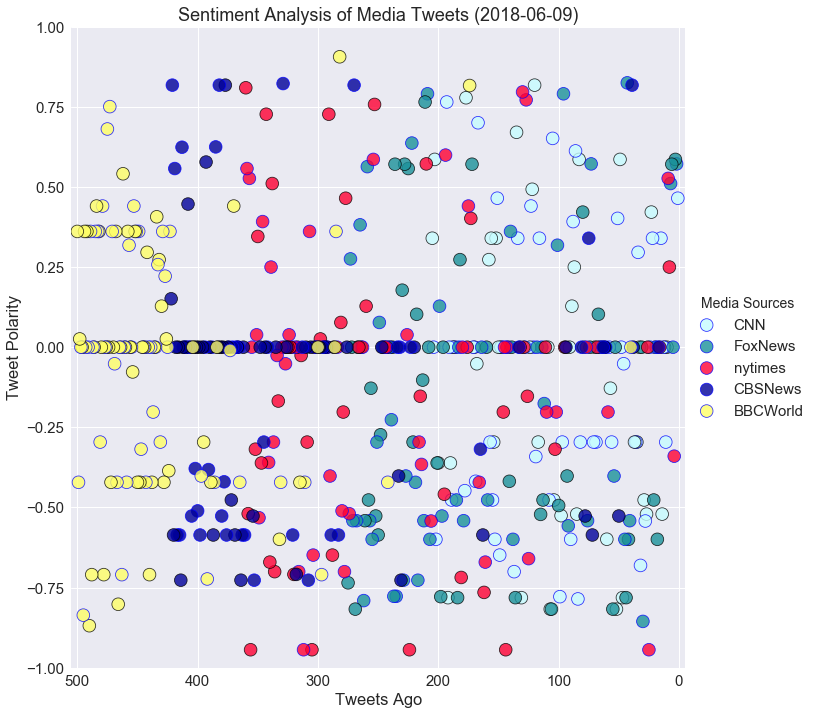

In [10]:

markersize = 160 
kws = dict(s=markersize, linewidth=.8, edgecolor="bk")
sns.set(font_scale = 1.5)

max_tweets = sentiments_df["Tweets Ago"].max()

pyber_palette = ['#c6fcff','#1b919a','#ff0033','#000099','#ffff66']  
# light Sky blue, Green, Red, blue, Yellow

# rename column header to match solution example
sentiments_df.rename(columns = {'Source':'Media Sources'}, inplace = True)  

Date = Date[:10] # extract only date from string

sns.lmplot(x='Tweets Ago', y='Compound', data=sentiments_df,
            fit_reg=False, # No regression line should be displayed
            palette=pyber_palette, 
            scatter_kws=kws,
            hue= 'Media Sources',
            size = 10,
            legend_out=True)
#plt.text(8, 45, "Note:\nCircle size correlates with driver count per city", horizontalalignment='left',size='medium', color='green', weight='light')
plt.title("Sentiment Analysis of Media Tweets ({})".format(Date))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim(max_tweets+5, -5.0)    # margins so plot doesn't end at max values
plt.ylim(-1, 1)

# Save the figure
plt.savefig("Sentiment Analysis of Media Tweets.png")

plt.show()

BBC = -0.032671999999999965, CBS = -0.10131, CNN = -0.07537000000000003, FOX = -0.163186, NYT = -0.09979999999999999


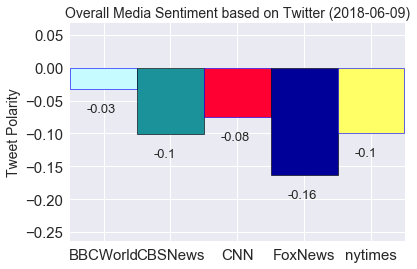

In [14]:

BBC = sentiments_df.groupby('Media Sources')['Compound'].mean()['BBCWorld']
CBS = sentiments_df.groupby('Media Sources')['Compound'].mean()['CBSNews']
CNN = sentiments_df.groupby('Media Sources')['Compound'].mean()['CNN']
FOX = sentiments_df.groupby('Media Sources')['Compound'].mean()['FoxNews']
NYT = sentiments_df.groupby('Media Sources')['Compound'].mean()['nytimes']
print("BBC = " + str(BBC) + ", CBS = " + str(CBS) + ", CNN = " + str(CNN) +", FOX = " + str(FOX) +", NYT = " + str(NYT))

x_labels = ['BBCWorld','CBSNews','CNN','FoxNews','nytimes']
y_sentiments = [BBC,CBS,CNN,FOX,NYT]
palette = ['#c6fcff','#1b919a','#ff0033','#000099','#ffff66']  
# light Sky blue, Green, Red, blue, Yellow

x_pos = [0,1,2,3,4]    # positions for media sources on x axis
plt.bar(x_pos, y_sentiments, color=sns.color_palette(palette,5), align='center', width = 1, edgecolor = 'bk', linewidth = .6)
plt.xlim(-0.5, len(x_labels)-0.49)   # 0.49 instead of 0.5 to show black edgeline of last bar
plt.ylim(min(y_sentiments)-0.1, max(y_sentiments)+0.1)  # margins of +/-0.1 beyond max/min values
plt.xticks(x_pos, x_labels)
plt.title("Overall Media Sentiment based on Twitter ({})".format(Date), fontsize=14)
plt.ylabel("Tweet Polarity", fontsize=14)
for a,b in zip(x_pos, y_sentiments):  # show values of each bar in the plot
    if b <= 0:
        B = b-0.035                   # position text below bar for negative bars.  
    else:                             # Value of 'b' is preserved as its ploted (bar height)
        B = b+0.015                   # position text above bar for positive bars
    plt.text(a-0.25, B, str(round(b, 2)), fontsize = 13)  # round to 2 decimal places before plotting

# Save the figure
plt.savefig("Overall Media Sentiment based on Twitter.png")

plt.show()